In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Define country labels
country_labels = ["Cambodia", "Indonesia", "Malaysia", "Philippines", "Singapore", "Thailand"]

# Load extracted features and labels
features = np.load("src/models/features/features.npy")
labels = np.load("src/models/labels.npy")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [6]:
# Define the parameter grid to tune the hyperparameters
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dtree_reg = DecisionTreeRegressor(random_state=42) # Initialize a decision tree regressor
grid_search = GridSearchCV(estimator=dtree_reg, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_dtree_reg = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred = best_dtree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
print(f"Test RMSE: {rmse}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=28.0min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=28.1min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=28.1min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=28.1min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=28.1min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=28.1min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=28.1min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=28.1min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=18.0min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=21.4min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=28.8min
[CV] END max_depth=10, m

In [1]:
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
# Define country labels
country_labels = ["Cambodia", "Indonesia", "Malaysia", "Philippines", "Singapore", "Thailand"]

# Load extracted features and labels
features = np.load("models/features/features.npy")
labels = np.load("models/labels.npy")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

#train decision tree
dt = DecisionTreeClassifier(max_depth=12, random_state=42)
dt.fit(X_train, y_train)

# Save the trained model
joblib.dump(dt, "models/decision_tree10.pkl")

print("All models saved successfully!")

# Performance check on training set
train_accuracy = dt.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

All models saved successfully!
Training Accuracy: 0.8667


Evaluating Decision Tree...
Decision Tree Accuracy: 47.38%
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.55      0.60       131
           1       0.40      0.43      0.42       120
           2       0.50      0.43      0.46       115
           3       0.36      0.41      0.39        94
           4       0.52      0.54      0.53       109
           5       0.40      0.46      0.43        81

    accuracy                           0.47       650
   macro avg       0.47      0.47      0.47       650
weighted avg       0.49      0.47      0.48       650



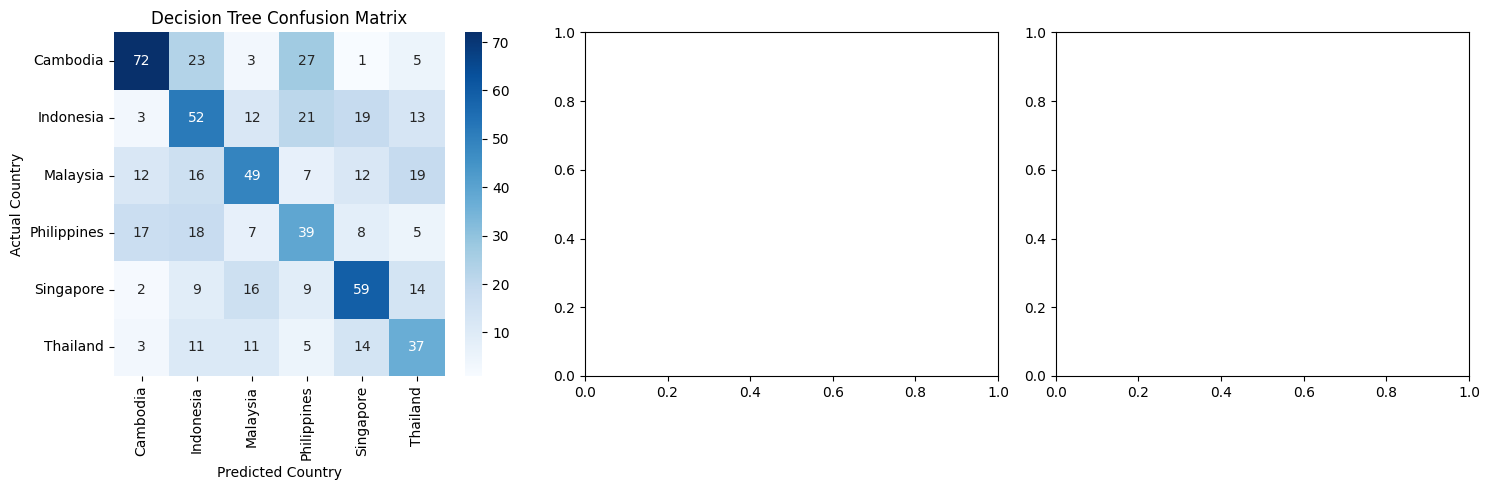

In [3]:
# Evaluate models and plot confusion matrices
models = {"Decision Tree": dt}
results = {}
accuracies = {}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    print(f"Evaluating {name}...")
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc * 100:.2f}%")
    print(f"{name} Classification Report:\n{classification_report(y_test, preds)}")
    results[name] = (acc, preds)
    accuracies[name] = acc

    # Compute confusion matrix
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=country_labels, yticklabels=country_labels, ax=axes[idx])
    axes[idx].set_title(f"{name} Confusion Matrix")
    axes[idx].set_xlabel("Predicted Country")
    axes[idx].set_ylabel("Actual Country")

plt.tight_layout()
plt.show()